# Import Wisconsin Breast Cancer Dataset

In [1]:
#Wisconsin Breast Cancer dataset
import matplotlib.pyplot as plt
import io
import pandas as pd
from sklearn.preprocessing import StandardScaler

cancer = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\AI_ML\wisconsin_breast.csv")
                 #header=None, encoding='utf-8')
pd.set_option('display.max_rows', 5)

#can dro the 'id' col
cancer.drop(['id'], inplace = True, axis = 1)

# reanme some cols
cancer=cancer.rename(columns={'concave points_mean':'concave_points_mean', 
                                'concave points_worst':'concave_points_worst', 'concave points_se':'concave_points_se'})

# Assign X and y
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

# scale it
# scaler = StandardScaler() 
# scaler.fit(X) 
# X_scaled = scaler.transform(X)

cancer.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


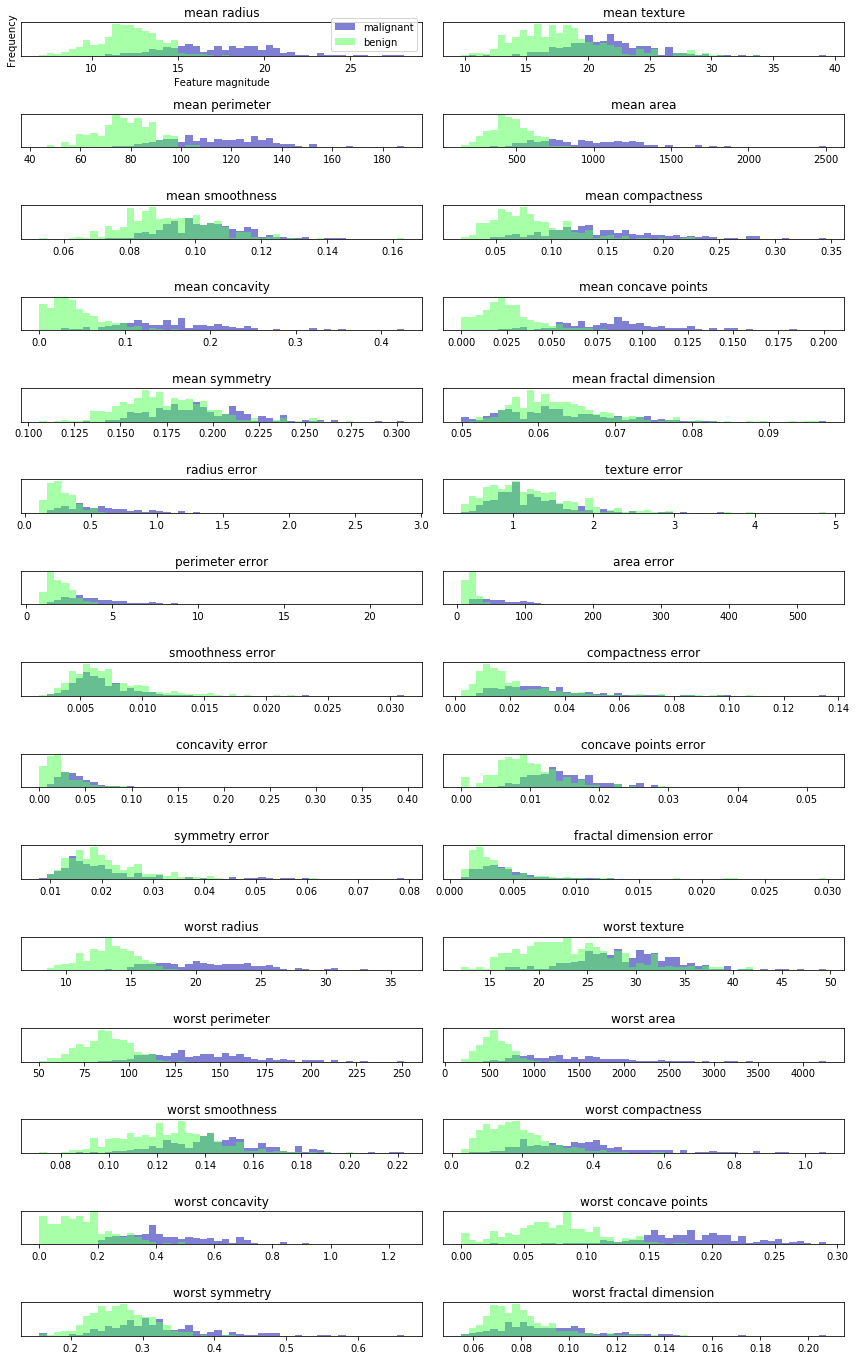

In [2]:
#  Per-class feature histograms on the Breast Cancer dataset
import matplotlib.pyplot as plt
import mglearn
import numpy as np

from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(12, 19))
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(()) 
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"],
                 loc="best")
    fig.tight_layout()
    
# from here we can see that there is a lot of overlap of the 2 distributions between, say, texture error. 
# so we're not going to get much new information there. However, looking at say, worst concave points,
# there's a lot of variation in the 2 populations, so we'll get a lot of information from that featuer.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# scale 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# PCA Analysis: Principal Components Analysis
PCA identifies the hyperplane that lies closest to the data, and then projects the data onto it.

In [3]:
from sklearn.decomposition import PCA # keep the first two principal components of the data 

pca = PCA(n_components=2) # fit PCA model to breast cancer data 
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of Breast Cancer dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of Breast Cancer dataset: {}".format(str(X_pca.shape)))

# reduced training dataset down to 2 features

Original shape of Breast Cancer dataset: (569, 30)
Reduced shape of Breast Cancer dataset: (569, 2)


In [45]:
from sklearn.decomposition import PCA

pca	= PCA(n_components = 2) 
X2D	= pca.fit_transform(X)

pca.explained_variance_ratio_

print("The 2 reduced features account for the following % variability in Breast Cancer dataset:\n "
      , pca.explained_variance_ratio_, ": 98.2% for the first feature and 1.6% for the second.")
# reducing to 2 features using PCA, 98% of the variance is explained by the first dimenstion, 1.6% by the second

The 2 reduced features account for the following % variability in Breast Cancer dataset:
  [0.98204467 0.01617649] : 98.2% for the first feature and 1.6% for the second.


In [46]:
import numpy as np

pca	= PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1
d
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 95% of the training set's variance
# 1 feature accounts for greater than or equal to 95% of the training dataset's variabiltiy

1

Text(0.5, 1.0, '\nExplained Variance by # of Dimensions using PCA\n')

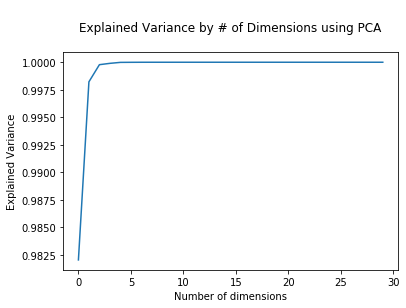

In [47]:
# Explained variance

# scale it

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by # of Dimensions using PCA\n")

Text(0, 0.5, 'Second principal component')

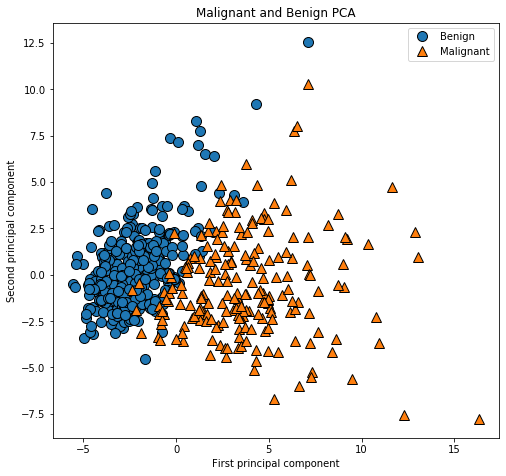

In [5]:
import numpy as np

import mglearn

# plot the 2 principal components

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(["Benign", "Malignant"],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("Malignant and Benign PCA")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

# can see that there's a bigger spread in the malignant, 1; more variation. Benign, 0, is more clustered.

In [48]:
print("PCA component shape: {}".format(pca.components_.shape)) ## should be 2 ft

PCA component shape: (30, 30)


Original shape of dataset: (455, 30)
Reduced shape of dataset: (455, 2)


Text(0, 0.5, 'Principal components')

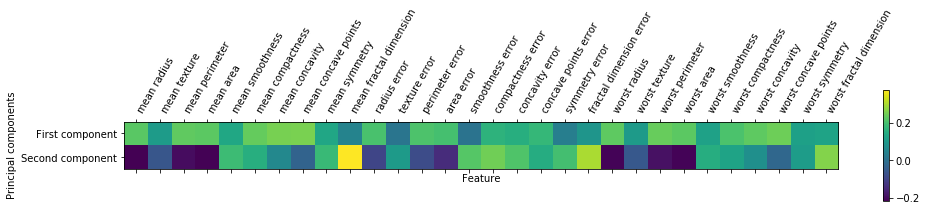

In [84]:
# heatmap coefficients for first and second component

from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
pca = PCA(n_components=2) # fit PCA model to breast cancer data 
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of dataset: {}".format(str(X_pca.shape)))

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar() 
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

# kNN: using PCA feature reduction

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

##############################################################################################
#normalization feature set
##############################################################################################
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

##############################################################################################
#Performing PCA using Scikit-Learn
##############################################################################################
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance between the 2 features: ", explained_variance)

##################################### [KNeighborsClassifier]
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_validation)

from sklearn.metrics import confusion_matrix, accuracy_score

print("\nkNN with PCA FS Confusion Matrix: \n\n", confusion_matrix(y_validation,y_pred))
knn_pca_accuracy = accuracy_score(y_validation, y_pred)*100
print('\nkNN with PCA FS Accuracy: {:.2f}%'.format(knn_pca_accuracy))
# with only one feature, kNN is able to correctly predict28 of 30 instances, 95.6% accuracy

Explained Variance between the 2 features:  [0.45240302 0.17810349]

kNN with PCA FS Confusion Matrix: 

 [[71  1]
 [ 4 38]]

kNN with PCA FS Accuracy: 95.61%


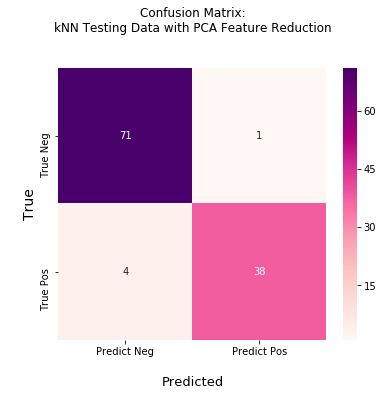

In [88]:
#Pretty Confusion Matrix for knn Testing Data

# X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_pca, y, test_size=0.20, random_state=1)

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,5))
cm_knn = confusion_matrix(y_validation, classifier.predict(X_validation))
sns.heatmap(cm_knn,annot=True, cmap="RdPu", fmt="d", 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nkNN Testing Data with PCA Feature Reduction\n\n")
plt.show()

--------------- KNeighborsClassifier : classifier.fit [Done]
--------------- KNeighborsClassifier : classifier.predict [Done]

kNN PCA Confusion Matrix:

[[71  1]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

kNN Accuracy with PCA fs and n_neighbors = 5: 
95.61%
--------------- mean error calculation [Done]



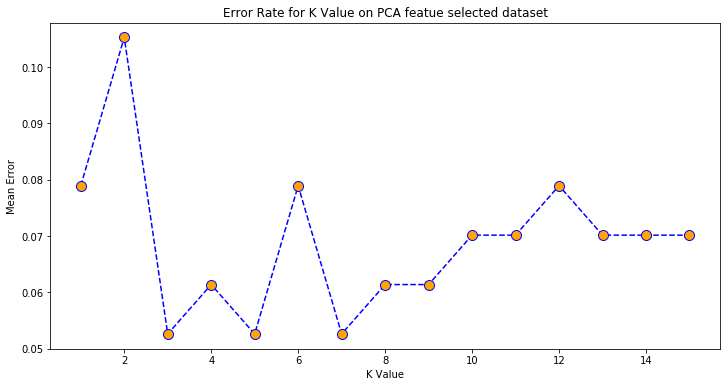

In [89]:
##################################### [KNeighborsClassifier]
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

classifier = KNeighborsClassifier(n_neighbors=5,)
classifier.fit(X_train, y_train)

print('--------------- KNeighborsClassifier : classifier.fit [Done]')

y_pred = classifier.predict(X_validation)

print('--------------- KNeighborsClassifier : classifier.predict [Done]\n')

from sklearn.metrics import classification_report, confusion_matrix
print('kNN PCA Confusion Matrix:\n')
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation,y_pred))

print('kNN Accuracy with PCA fs and n_neighbors = 5: ') 
print('%.2f' % knn_pca_accuracy + '%') #score

error = []

# Calculating error for K values between 1 and 16
for i in range(1, 16): # 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_validation)
    error.append(np.mean(pred_i != y_validation))

print('--------------- mean error calculation [Done]\n')

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(range(1, 16), error, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate for K Value on PCA featue selected dataset')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [90]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_reduced.shape[1])
print('Explained Variance using top 2 features: ', pca.explained_variance_ratio_)

[443782.6051466    7310.10006165]
Original number of features: 30
Reduced number of features: 2
Explained Variance using top 2 features:  [0.98204467 0.01617649]


# k-Means Clustering

K Means Clustering tries to cluster your data into clusters based on their similarity.

Step 1: Choose the number of clusters, K. 

Step 2: Randomly select K centroids. These centroids can be from the dataset or could be any random point

Step 3: Assign each data point to the nearest centroid

Step 4: Recompute the new centroid and place the new centroid for each cluster

Step 5: Based on new centroid, check if any data points in the dataset can be reassigned to a different cluster, if the data points changed the cluster then go to step 3. If no reassignment happened then all the data points are grouped in K clusters.

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline

n_clusters = 2

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30)

# Create the scaler.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

cancer = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\AI_ML\wisconsin_breast.csv")
cancer.drop(['id'], inplace = True, axis = 1)
cancer=cancer.rename(columns={'concave points_mean':'concave_points_mean', 
                                'concave points_worst':'concave_points_worst', 'concave points_se':'concave_points_se'})

# Assign X and y
X_cancer = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

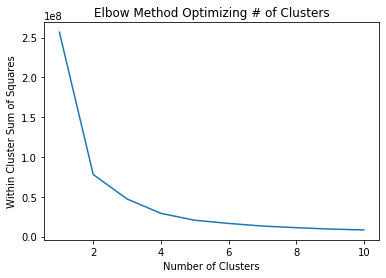

In [8]:
# Elbow method for finding ideal number of k
# wcss, within-cluster sum of squares

#Find the sum of square distances of each data point 
# from centroid of the cluster, also called as within cluster sum of squares

X_cancer = cancer.drop('diagnosis', axis = 1)
# y is irrelevant! Fiding my clusters within my features.

wcss_cancer=[]
for i in range(1,11):
    kmeans_cancer = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means_cancer = kmeans_cancer.fit(X_cancer)
    wcss_cancer.append(y_means_cancer.inertia_)

# Plot
plt.plot(range(1,11), wcss_cancer)
plt.title("Elbow Method Optimizing # of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.xlabel("Number of Clusters")
plt.show()

# the location of the huge bend is considered the optimal # for k, so in my case there's a
# steep dropoff at 2 in my sum of squares, so 2 is probably the best number of clusters. 

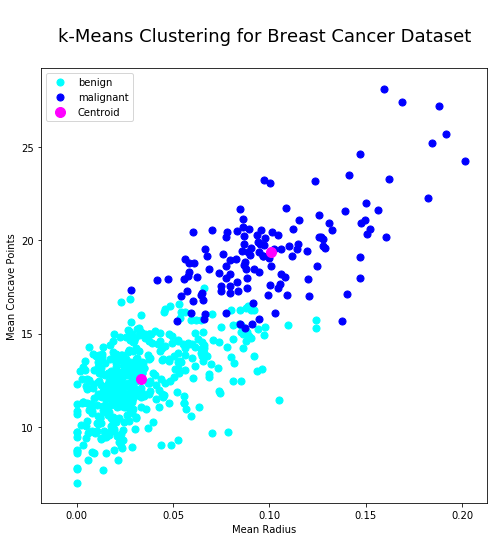

In [15]:
# Visualize
import numpy

kmeans_cancer = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans_cancer = kmeans_cancer.fit_predict(X_cancer)


plt.figure(figsize=(8,8))
plt.scatter(X_cancer.iloc[y_kmeans_cancer == 0,7], X_cancer.iloc[y_kmeans_cancer == 0,0], s= 50, color = 'cyan', label ='benign')
plt.scatter(X_cancer.iloc[y_kmeans_cancer == 1,7], X_cancer.iloc[y_kmeans_cancer == 1,0], s= 50, color = 'blue', label ='malignant')

plt.scatter(kmeans_cancer.cluster_centers_[:,7], kmeans_cancer.cluster_centers_[:,0], s= 100, color = 'magenta', label ='Centroid')
plt.title('\nk-Means Clustering for Breast Cancer Dataset\n', size = 18)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Concave Points')
plt.legend()
plt.show()

# SVM for Breast Cancer

In [55]:
##############################################################################################
#Split-out dataset
##############################################################################################
 
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X) # scaling my train dataset
X_scaled = scaler.transform(X)

# Use the reduced features from PCA on model

pca = PCA(n_components=2) # fit PCA model to breast cancer data 
pca.fit(X_scaled)# transform data onto the first two principal components 
X_pca = pca.transform(X_scaled) 

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_pca, y, test_size=0.20, random_state=1)

print('--------------- Split-out dataset [Done]')


##################################### [SVC kernel=linear]
from sklearn.svm import SVC
classifier = SVC(C=100, gamma = 0.001,
                kernel = 'rbf') #{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}'# passed in the parameter values from the GridSearchCV results
classifier.fit(X_train, y_train)

print('--------------- SVM on PCA dataset : classifier.fit [Done]')

y_pred = classifier.predict(X_validation)

print('--------------- SVM : classifier.predict [Done]')

from sklearn.metrics import classification_report, confusion_matrix
print ("----------------------> [SVM]\n")

svm_score = classifier.score(X_validation, y_validation)*100
from sklearn.model_selection import cross_val_score
print('SVM accuracy, with PCA: {:.2f}%'.format(svm_score))

print('\nSVM with PCA dataset Confusion Matrix\n')
print(confusion_matrix(y_validation,y_pred))
print(classification_report(y_validation,y_pred))

# overall accuracy 90.35%, lots of misfires with benign recall, only 77%
# perfect recall for malignant, tho

# After passing the parameters from gridsearchCV (penalty C and linear kernal)
# accuracy improved dramatically,from 90.35 to 95.6%

--------------- Split-out dataset [Done]
--------------- SVM on PCA dataset : classifier.fit [Done]
--------------- SVM : classifier.predict [Done]
----------------------> [SVM]

SVM accuracy, with PCA: 95.61%

SVM with PCA dataset Confusion Matrix

[[71  1]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [56]:
# Use GridSearchCV to optimize my parameters. 

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0)

# Set the parameters by cross-validation, 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.961 (+/-0.026) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.853 (+/-0.013) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.977 (+/-0.035) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.961 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.982 (+/-0.034) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.977 (+/-0.035) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.045) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.028) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.967 (+/-0.036) for {'C': 1, 'kernel': 'linear'}
0.960 (+/-0.062) for {'C': 10, 'kernel': 'linear'}
0.950 (+/-0.048) for {'C': 100, 'kernel': 'linear'}
0.942 (+/-0.033) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model

In [57]:
# using Medium.com article

from sklearn import svm
trainedsvm = svm.SVC().fit(X_train, y_train)
predictionsvm = trainedsvm.predict(X_test)

print(confusion_matrix(y_test, predictionsvm))
print(classification_report(y_test, predictionsvm))

# default parameters

[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave_points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave_points_worst' 'symmetry_worst' 'fractal_dimension_worst']


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


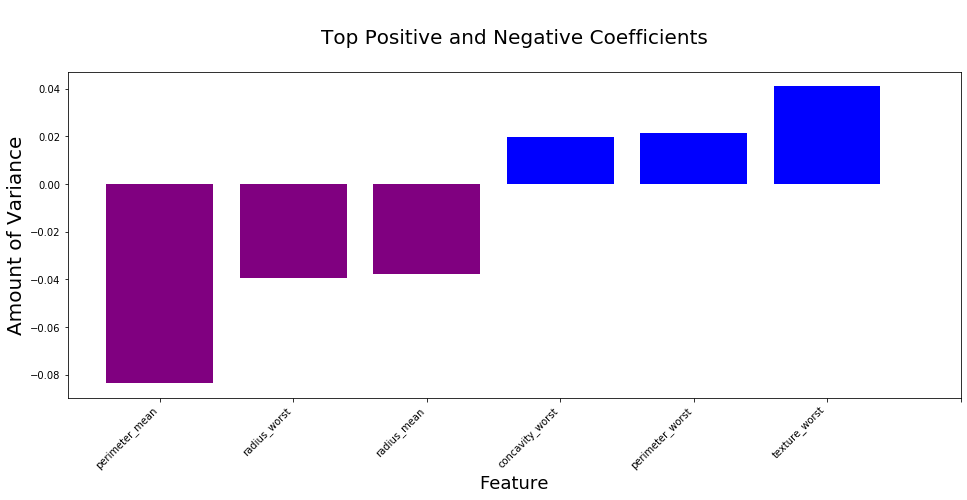

In [58]:
# Kernel Trick for non-linear data

# feature importance 

from sklearn import svm
import matplotlib.pyplot as plt

def feature_plot(classifier, feature_names, top_features=3):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(16, 6))
    colors = ['purple' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.xlabel("Feature", size = 18)
    plt.ylabel("Amount of Variance", size = 20)
    plt.title("\nTop Positive and Negative Coefficients\n", size = 20)
    plt.show()

print(cancer.drop(['diagnosis'], axis = 1).columns.values)

trainedsvm = svm.LinearSVC().fit(X, y)
feature_plot(trainedsvm, cancer.drop(['diagnosis'], axis = 1).columns.values)

# Naive Bayes with PCA dataset

In [59]:
# Gaussian Naive Bayes Baybeeeeee
# used becasue we're assuming our features follow a normal distribution, and can contain decimal vals.

##############################################################################################
# Split-out dataset
##############################################################################################

##################################### [GaussianNB]
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


array = cancer.values
X = cancer.drop('diagnosis', axis=1)
y = cancer['diagnosis']

pca = PCA(n_components=2) # fit PCA model to breast cancer data 
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 


X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_pca, y, test_size=0.20, random_state=1)

print('--------------- Split-out dataset [Done]')

classifier = GaussianNB()
classifier.fit(X_train_nb, y_train_nb)

print('--------------- GaussianNB : classifier.fit [Done]')

y_pred_nb = classifier.predict(X_test_nb)

print('--------------- GaussianNB : classifier.predict [Done]')

from sklearn.metrics import classification_report, confusion_matrix

print ("\n----------------------> [GaussianNB]\n\n Gaussian Confusion Matrix on PCA dataset:\n")
print(confusion_matrix(y_test_nb, y_pred_nb))
print(classification_report(y_test_nb, y_pred_nb))

from sklearn.metrics import accuracy_score

classifier.fit(X_train_nb, y_train_nb)

# print('Accuracy of Gaussian Naive Bayes training model: %.2f' %
#       (GaussianNB.score(X_train_nb, y_train_nb)*100) + '%')
# hm, wonder why the training model is not accepting the score


gaussianNB_accur = accuracy_score(y_test_nb, y_pred_nb, normalize = True)*100 #normalized 
print('Naive Bayes Gaussian Testing accuracy for PCA dataset was: %.2f' %+ gaussianNB_accur + '%')


--------------- Split-out dataset [Done]
--------------- GaussianNB : classifier.fit [Done]
--------------- GaussianNB : classifier.predict [Done]

----------------------> [GaussianNB]

 Gaussian Confusion Matrix on PCA dataset:

[[68  4]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        72
           1       0.90      0.83      0.86        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114

Naive Bayes Gaussian Testing accuracy for PCA dataset was: 90.35%


# Decision Tree for Breast Cancer Dataset

In [312]:
# Next up: decision tree classifier

##################################### [DecisionTreeClassifier]
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.model_selection import train_test_split

array = cancer.values
X = cancer.drop('diagnosis', axis=1)
y = cancer['diagnosis']

# X_scaled = scaler.transform(X_train_dt)

# pca = PCA(n_components=2) # fit PCA model to breast cancer data 
# pca.fit(X_scaled)# transform data onto the first two principal components 


# X_pca = pca.transform(X_scaled) 


X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_pca, y, test_size=0.20, random_state=1)
scaler.fit(X_train_dt)

sc = StandardScaler()
X_train_dt = sc.fit_transform(X_train_dt)
X_test_dt = sc.transform(X_test_dt)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_dt = pca.fit_transform(X_train_dt)
X_test_dt = pca.transform(X_test_dt)

classifier_dt_pca = DecisionTreeClassifier()

classifier_dt_pca.fit(X_train_dt, y_train_dt)
print('--------------- DecisionTreeClassifier : classifier.fit [Done]')

y_pred_dt = classifier_dt_pca.predict(X_test_dt)

print('--------------- DecisionTreeClassifier : classifier.predict [Done]')


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
from scipy.stats import randint

# use feature importance 
feature_fi = cancer
                 
X_fi = cancer.drop('diagnosis', axis=1)
y_fi = cancer['diagnosis']

#build a classifier
clf_fi = DecisionTreeClassifier()


# Utility function to report best scores
def report(result, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(result['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f}% (std: {1:.3f})"
                  .format(result['mean_test_score'][candidate]*100,
                          result['std_test_score'][candidate]))
            print("Parameters: {0}".format(result['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [2, 10], # I set a limit of 10 for max depth, otherwise all models would select None 
              "random_state": randint(0,100),
              "min_samples_split": randint(2,10),
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
#run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf_fi, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 10) # 10x cross-validation

start = time()
random_search.fit(X_fi, y_fi)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

--------------- DecisionTreeClassifier : classifier.fit [Done]
--------------- DecisionTreeClassifier : classifier.predict [Done]
RandomizedSearchCV took 9.99 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 94.73% (std: 0.029)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 34}

Model with rank: 2
Mean validation score: 94.38% (std: 0.030)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 28}

Model with rank: 3
Mean validation score: 94.03% (std: 0.045)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 7, 'random_state': 31}

Model with rank: 3
Mean validation score: 94.03% (std: 0.045)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 4, 'random_state': 57}

Model with rank: 5
Mean validation score: 94.03% (std: 0.02

In [306]:
from sklearn import tree
dt_clf_pca = tree.DecisionTreeClassifier( max_features = 2,
                                  criterion = 'entropy', max_depth = 10, min_samples_leaf=5,
                                 random_state = 50, min_samples_split = 9)

# Fit the model, see the params
dt_clf_pca = dt_clf_pca.fit(X_train_dt, y_train_dt)
dt_clf_pca

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [313]:
# Training Dataset

from sklearn import metrics
def measure_perf(X_pca, y, dt_clf_pca, show_accuracy=True,
                show_classification_report=True, show_confusion_matrix=True):
    y_pred_dt = dt_clf_pca.predict(X_pca)
    if show_accuracy:
        print('Training Data Decision Tree Accuracy with PCA dataset: {0:.2f}% '.format(
                metrics.accuracy_score(y, y_pred_dt)*100
                ),"\n")
        if show_classification_report:
            print("Classification report")
            print(metrics.classification_report(y, y_pred_dt), "\n")
        if show_confusion_matrix:
            print("Confusion Matrix\nDecision Tree with PCA Training dataset : \n")
            print(metrics.confusion_matrix(y, y_pred_dt),"\n")
# measure performance

measure_perf(X_train_dt, y_train_dt, dt_clf_pca, 
            show_classification_report = True, show_confusion_matrix = True)

#wow, decision tree with some pruning is quite accurate, 98.5%. Probably I'm overfitting...?

Training Data Decision Tree Accuracy with PCA dataset: 96.70%  

Classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       285
           1       0.94      0.98      0.96       170

    accuracy                           0.97       455
   macro avg       0.96      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455
 

Confusion Matrix
Decision Tree with PCA Training dataset : 

[[274  11]
 [  4 166]] 



In [314]:
from sklearn import tree
dt_test_pca = tree.DecisionTreeClassifier(criterion = 'entropy',
                                          max_depth = 10, min_samples_leaf=5,
                                 random_state = 50, min_samples_split = 9)

# Fit the model, see the params
dt_test_pca = dt_test_pca.fit(X_test_dt, y_test_dt)
dt_test_pca

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [315]:
# Testing Dataset

from sklearn import metrics
def measure_perf(X_pca, y, dt_test_pca, show_accuracy=True,
                show_classification_report=True, show_confusion_matrix=True):
    y_pred_dt = dt_test_pca.predict(X_pca)
    if show_accuracy:
        print('Testing Data Decision Tree Accuracy with PCA dataset: {0:.2f}% '.format(
                metrics.accuracy_score(y_test_dt, y_pred_dt)*100
                ),"\n")
        if show_classification_report:
            print("Classification report")
            print(metrics.classification_report(y_test_dt, y_pred_dt), "\n")
        if show_confusion_matrix:
            print("Confusion Matrix\nDecision Tree with PCA Testing dataset : \n")
            print(metrics.confusion_matrix(y_test_dt, y_pred_dt),"\n")
# measure performance

measure_perf(X_test_dt, y_test_dt, dt_test_pca, 
            show_classification_report = True, show_confusion_matrix = True)

#wow, decision tree with some pruning is quite accurate, 94.7%. 

Testing Data Decision Tree Accuracy with PCA dataset: 94.74%  

Classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114
 

Confusion Matrix
Decision Tree with PCA Testing dataset : 

[[70  2]
 [ 4 38]] 



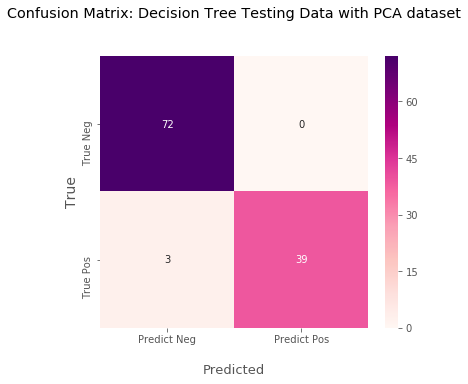

In [249]:
#Pretty Confusion Matrix for Testing Data

# X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_pca, y, test_size=0.20, random_state=1)

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,5))
cm_dt = confusion_matrix(y_test_dt,
                         dt_test_pca.predict(X_test_dt))
sns.heatmap(cm_dt,annot=True, cmap="RdPu", fmt="d", 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix: Decision Tree Testing Data with PCA dataset\n\n")
plt.show()

X_pca:  569
X_train_pca :  455
X_test_pca:  114


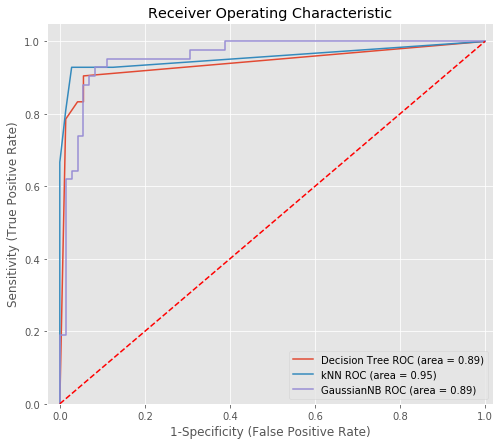

In [325]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train_pca)
X_test_pca = sc.transform(X_test_pca)

pca = PCA(n_components=2)
# X_pca = pca.transform(X_scaled)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

X_train_pca, X_test_pca, y_train_pca, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=1)

print("X_pca: ", len(X_pca))
print("X_train_pca : ", len(X_train_pca))
print("X_test_pca: ", len(X_test_pca))

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [

{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(max_features = 2,
                                  criterion = 'gini', max_depth = None, min_samples_leaf=2,
                                 random_state = 6, min_samples_split = 5)
}, 
{
    'label': 'kNN',
    'model': KNeighborsClassifier(n_neighbors=5),
},    
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},  
]

# Below for loop iterates through my models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_pca, y_train_pca) # train the model
    y_pred_pca = model.predict(X_test_pca) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, model.predict(X_test_pca))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.savefig('ROC_combos.png', dpi=100)
fig.set_size_inches(8, 7, forward=True)
plt.show()